In [36]:
import numpy as np
import sounddevice as sd
import soundfile as sf
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftshift
from scipy import signal as window
from suaBibSignal import *
import time
import peakutils
import scipy.io.wavfile as wav

In [37]:
bib = signalMeu()
fs = 44100
duration = 4
t=np.linspace(0, duration, duration*fs)
sd.default.samplerate = fs
sd.default.channels = 1

## Gravando e salvando áudio

In [72]:
for i in range(3):
    print("Gravando em {}!".format(3-i))
    time.sleep(1)

print("Gravando!!!")

recording = sd.rec(int(duration * fs), fs, 2, blocking='True')
sd.wait()

print("Gravação finalizada :)")

wav.write("./audio.wav", fs, recording)

Gravando em 3!
Gravando em 2!
Gravando em 1!
Gravando!!!
Gravação finalizada :)


## Lendo e normalizando áudio

In [73]:
audio, samplerate = sf.read("audio.wav")
audio = audio[:,1]

sd.play(audio)
sd.wait

<function sounddevice.wait(ignore_errors=True)>

In [67]:
const = max(abs(audio))
audioN = audio/const
sd.play(audioN)
sd.wait()

## Filtrando e Modulando áudio

In [68]:
audioF = bib.LPF(audioN, 4000, fs)
sd.play(audioF)
sd.wait()

In [70]:
audioM = bib.modula(audioF, fs)
sd.play(audioM)
sd.wait()

## Fourier áudio original

Text(0, 0.5, 'Amplitude')

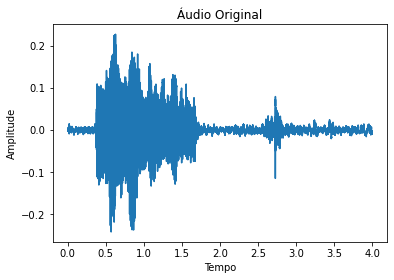

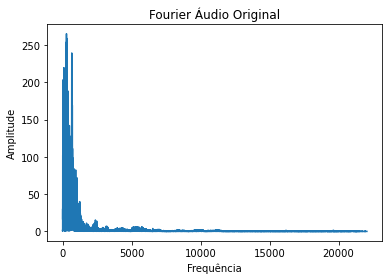

In [60]:
audioFFT = bib.calcFFT(audio, fs)
plt.figure()
plt.title("Áudio Original") 
plt.plot(t, audio)
plt.xlabel("Tempo")
plt.ylabel("Amplitude")

plt.figure()
plt.title("Fourier Áudio Original")
plt.plot(audioFFT[0], audioFFT[1])
plt.xlabel("Frequência")
plt.ylabel("Amplitude")

## Fourier Áudio Normalizado

Text(0, 0.5, 'Amplitude')

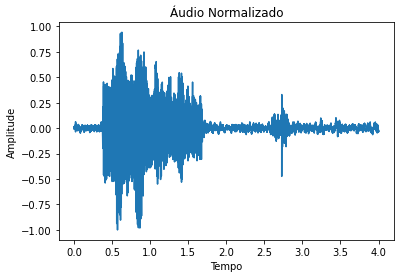

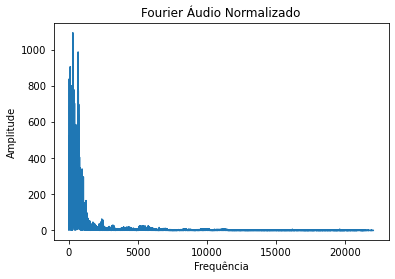

In [61]:
audioNFFT = bib.calcFFT(audioN, fs)

plt.figure()
plt.title("Áudio Normalizado")
plt.plot(t, audioN)
plt.xlabel("Tempo")
plt.ylabel("Amplitude")

plt.figure()
plt.title("Fourier Áudio Normalizado")
plt.plot(audioNFFT[0], audioNFFT[1])
plt.xlabel("Frequência")
plt.ylabel("Amplitude")

## Fourier Áudio Filtrado

Text(0, 0.5, 'Amplitude')

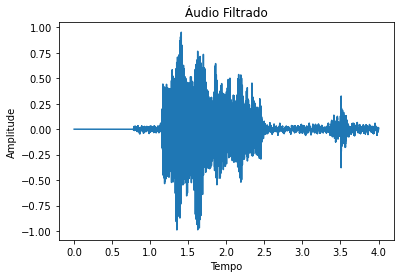

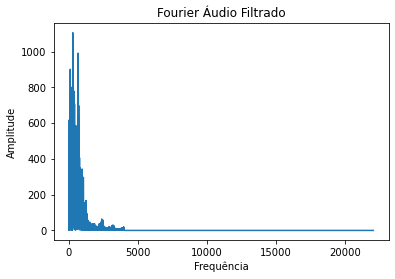

In [62]:
audioFFFT = bib.calcFFT(audioF, fs)

plt.figure()
plt.title("Áudio Filtrado")
plt.plot(t, audioF)
plt.xlabel("Tempo")
plt.ylabel("Amplitude")

plt.figure()
plt.title("Fourier Áudio Filtrado")
plt.plot(audioFFFT[0], audioFFFT[1])
plt.xlabel("Frequência")
plt.ylabel("Amplitude")

## Fourier Áudio Modulado 

Text(0, 0.5, 'Amplitude')

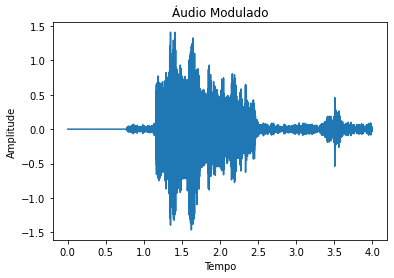

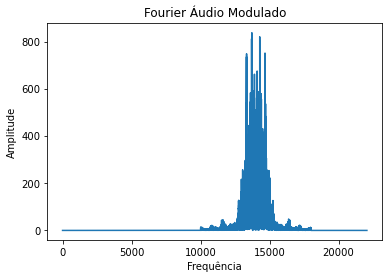

In [63]:
audioMFFT = bib.calcFFT(audioM, fs)

plt.figure()
plt.title("Áudio Modulado")
plt.plot(t, audioM)
plt.xlabel("Tempo")
plt.ylabel("Amplitude")

plt.figure()
plt.title("Fourier Áudio Modulado")
plt.plot(audioMFFT[0], audioMFFT[1])
plt.xlabel("Frequência")
plt.ylabel("Amplitude")

## Demodulando Áudio

In [71]:
audioDM = bib.LPF(bib.modula(audioM, fs), 4000, fs)

audioDMFFT = bib.calcFFT(audioDM, fs)

sd.play(audioDM)
sd.wait()

Text(0, 0.5, 'Amplitude')

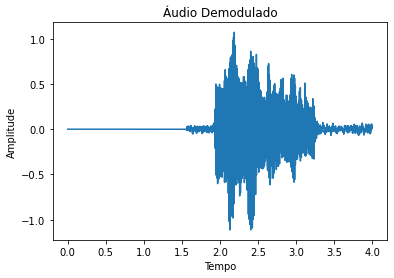

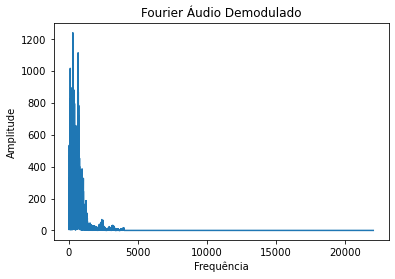

In [65]:
audioDMFFT = bib.calcFFT(audioDM, fs)

plt.figure()
plt.title("Áudio Demodulado")
plt.plot(t, audioDM)
plt.xlabel("Tempo")
plt.ylabel("Amplitude")

plt.figure()
plt.title("Fourier Áudio Demodulado")
plt.plot(audioDMFFT[0], audioDMFFT[1])
plt.xlabel("Frequência")
plt.ylabel("Amplitude")